In this project, I create a SQL database for the sales data of "Company X" in various countries from 2011 to 2020.

I am using the **sqlite3** library to create SQL DB and **Matplotlib** library to visualise the data.

First, I will create a connection object to represent the database. I use this object to make a cursor object, which will be used to communicate with our DB.

In [141]:
import sqlite3

con = sqlite3.connect(":memory:")
cur = con.cursor()

print(con)
print(cur)

Now we can start creating the Sales table, I do so using the SQL **Create** Statement.
I will also insert the sales figure for India for 2011, and print it.

In [142]:
cur.execute("create table sales (year, country, sale)")

cur.execute("insert into sales values (2011, 'India', 700)")

# Printing the first row
cur.execute("select year, country, sale from sales")
print(cur.fetchall())

[(2011, 'India', 700)]


Now I will go ahead and add data for three more countries and print it as well.

In [143]:
cur.execute('''insert into sales values (2011, 'Indonesia', 500),
                (2011, 'Japan', 600),
                (2011, 'China', 400)''')

for row in cur.execute("select year, country, sale from sales"):
  print(row)

(2011, 'India', 700)
(2011, 'Indonesia', 500)
(2011, 'Japan', 600)
(2011, 'China', 400)


Now I will use **Random** library to insert random sale figures into the sales table.
I will create a list of countries and using nested for loops, I will insert random sale figures in sales table.

In [144]:
countries = ["India", "Indonesia", "Japan", "China"]

import random

insert_statement = "insert into sales values(?, ?, ?)"

for year in range(2012,2021):
  for country in countries:
    sale = random.randint(1,8) * 100
    val = year, country, sale
    cur.execute(insert_statement, val)

And here's how are table looks now.

In [145]:
for row in cur.execute("select year, country, sale from sales"):
  print(row)

(2011, 'India', 700)
(2011, 'Indonesia', 500)
(2011, 'Japan', 600)
(2011, 'China', 400)
(2012, 'India', 400)
(2012, 'Indonesia', 500)
(2012, 'Japan', 400)
(2012, 'China', 300)
(2013, 'India', 600)
(2013, 'Indonesia', 200)
(2013, 'Japan', 100)
(2013, 'China', 800)
(2014, 'India', 200)
(2014, 'Indonesia', 800)
(2014, 'Japan', 100)
(2014, 'China', 300)
(2015, 'India', 400)
(2015, 'Indonesia', 200)
(2015, 'Japan', 700)
(2015, 'China', 600)
(2016, 'India', 300)
(2016, 'Indonesia', 100)
(2016, 'Japan', 100)
(2016, 'China', 300)
(2017, 'India', 600)
(2017, 'Indonesia', 800)
(2017, 'Japan', 700)
(2017, 'China', 700)
(2018, 'India', 600)
(2018, 'Indonesia', 500)
(2018, 'Japan', 600)
(2018, 'China', 200)
(2019, 'India', 200)
(2019, 'Indonesia', 100)
(2019, 'Japan', 700)
(2019, 'China', 500)
(2020, 'India', 600)
(2020, 'Indonesia', 800)
(2020, 'Japan', 500)
(2020, 'China', 600)


Now that we have sales data of 10 years we can go further and visualise it using the **Matplotlib** library.

I will now assign the sales data to their respective variables to make a line graph.

In [146]:
cur.execute("select distinct year from sales")
x_axis = cur.fetchall()

cur.execute("select sale from sales where country='India'")
sales_india = cur.fetchall()

cur.execute("select sale from sales where country='Indonesia'")
sales_indonesia = cur.fetchall()

cur.execute("select sale from sales where country='Japan'")
sales_japan = cur.fetchall()

cur.execute("select sale from sales where country='China'")
sales_china = cur.fetchall()

I will now import **Pylab** from the **Matplotlib** Library and push the sales data variables to the plot function to create a graph.

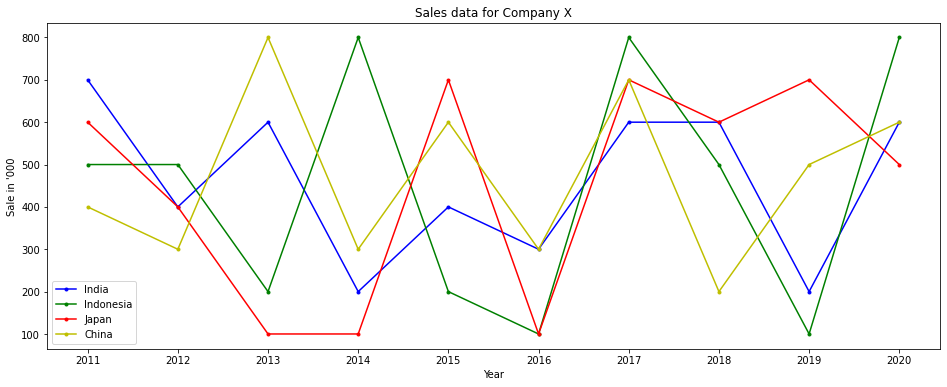

In [147]:
import matplotlib.pylab as plt

plt.figure(figsize=(16,6))

plt.plot(x_axis, sales_india, 'b.-', label='India')
plt.plot(x_axis, sales_indonesia, 'g.-', label='Indonesia')
plt.plot(x_axis, sales_japan, 'r.-', label='Japan')
plt.plot(x_axis, sales_china, 'y.-', label='China')

plt.legend()
plt.title("Sales data for Company X")
plt.xticks(x_axis)
plt.xlabel("Year")
plt.ylabel("Sale in '000")

plt.show()

At last I will close the connection to destroy the DB.

In [140]:
#closing connecton & destroying db
con.close()

print("Connection closed. Thanks!")



Connection closed. Thanks!
